![](https://www.immigration.ca/wp-content/uploads/2018/12/Canada-Immigration_156421093.jpeg)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data = pd.read_csv('../input/immigration-to-canada/immigration_Canada.csv')
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
3,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
4,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45


# Preparing Data

In [3]:
data = data.rename(columns={'OdName': 'Country', 'AreaName': 'Region'}).drop(['Type','Coverage','AREA','REG','DEV','RegName','DevName'], 
                                                                                axis=1).set_index('Country')
data

,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,16,39,39,47,71,340,496,741,828,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,1,0,0,0,0,0,1,2,2,...,1450,1223,856,702,560,716,561,539,620,603
American Samoa,Oceania,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,0,0,0,0,0,0,2,0,0,...,0,0,1,1,0,0,0,0,1,1
Angola,Africa,1,3,6,6,4,3,5,5,11,...,268,295,184,106,76,62,61,39,70,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Africa,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,Asia,1,2,1,6,0,18,7,12,7,...,124,161,140,122,133,128,211,160,174,217
Zambia,Africa,11,17,11,7,16,9,15,23,44,...,56,91,77,71,64,60,102,69,46,59


In [4]:
data = data.drop(data.index[-1])
data.tail(3)

,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Yemen,Asia,1,2,1,6,0,18,7,12,7,...,124,161,140,122,133,128,211,160,174,217
Zambia,Africa,11,17,11,7,16,9,15,23,44,...,56,91,77,71,64,60,102,69,46,59
Zimbabwe,Africa,72,114,102,44,32,29,43,68,99,...,1450,615,454,663,611,508,494,434,437,407


In [5]:
data.shape

(178, 35)

In [6]:
data.isna().sum().to_frame('Null Values')

,Null Values
Region,0
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0
1986,0
1987,0
1988,0


# Plotting Data Distribution

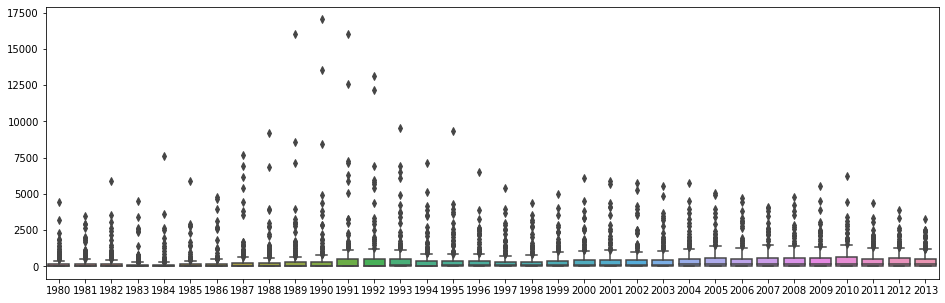

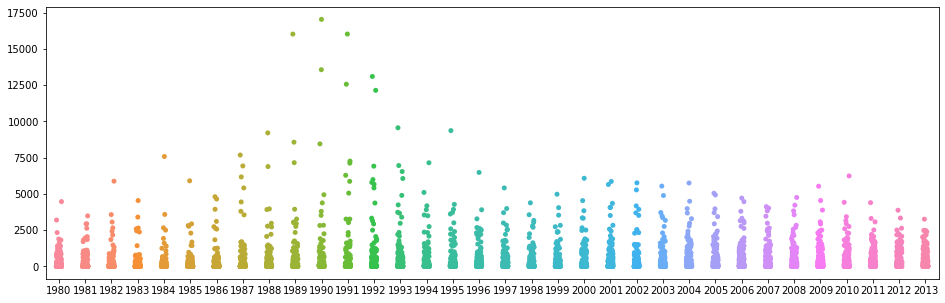

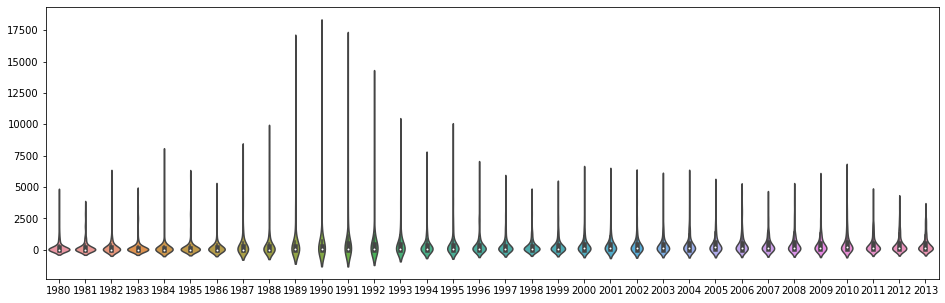

In [7]:
plt.figure(figsize=(16,5))
sns.boxplot(data=data)
plt.show()
plt.figure(figsize=(16,5))
sns.stripplot(data=data)
plt.show()
plt.figure(figsize=(16,5))
sns.violinplot(data=data)
plt.show()

# Analysis & Visualization

## Year-wise Analysis

In [8]:
year = pd.DataFrame(data.iloc[:,2:].sum(), columns=['Total'])
year.head()

,Total
1981,43052
1982,45480
1983,34972
1984,37617
1985,37640


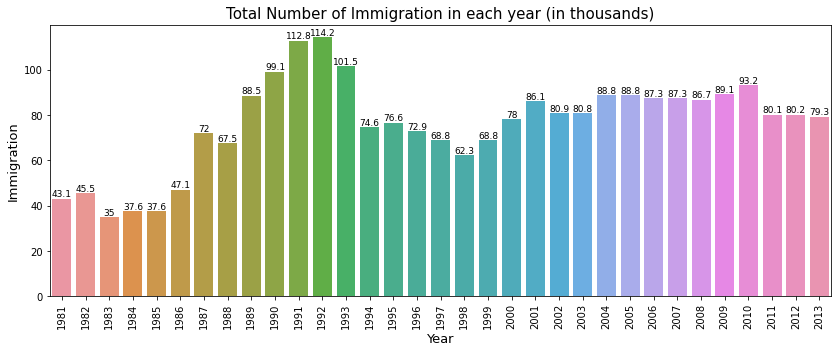

Most number of immigration: 114197(1992)      
Least number of immigration: 34972(1983)


In [9]:
plt.figure(figsize=(14,5))
plt.title('Total Number of Immigration in each year (in thousands)', fontsize=15)
plot = sns.barplot(year.index, np.round(year.Total/1000, decimals=1))
plt.bar_label(plot.containers[0], size=9)
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Immigration', fontsize=13)
plt.show()
max = year[year.Total == year.Total.max()]
min = year[year.Total == year.Total.min()]
print(f'Most number of immigration: {max.Total[0]}({max.index[0]})\
      \nLeast number of immigration: {min.Total[0]}({min.index[0]})')

## Country-wise Analysis

In [10]:
country = data.iloc[:,:1]
country['Total'] = data.sum(axis=1)
country.head()

,Region,Total
Country,,
Afghanistan,Asia,58639
Albania,Europe,15699
American Samoa,Oceania,6
Andorra,Europe,15
Angola,Africa,2113


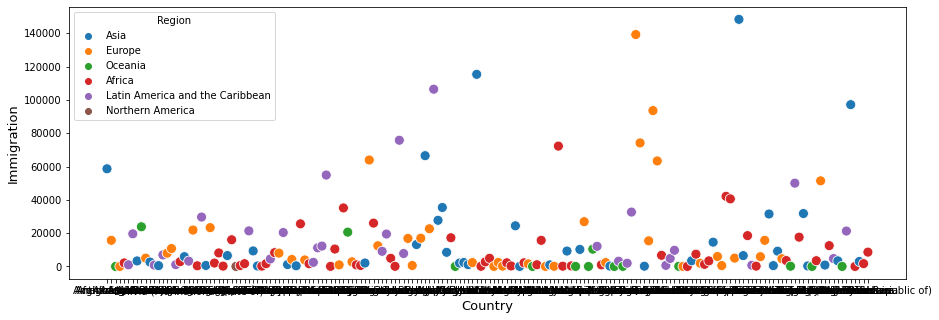

In [11]:
plt.figure(figsize=(15,5))
sns.scatterplot(country.index, country.Total, hue=country.Region, s=100)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Immigration', fontsize=13)
plt.show()

In [12]:
country = country.sort_values('Total', ascending=False)
country

,Region,Total
Country,,
Sri Lanka,Asia,148358
Poland,Europe,139241
Lebanon,Asia,115359
Jamaica,Latin America and the Caribbean,106431
Viet Nam,Asia,97146
...,...,...
San Marino,Europe,5
New Caledonia,Oceania,5
Western Sahara,Africa,2


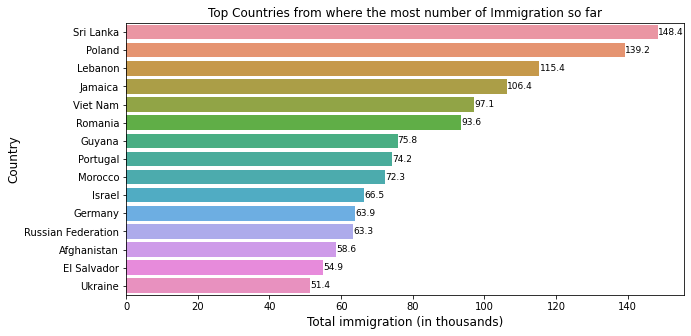

In [13]:
plt.figure(figsize=(10,5))
plt.title('Top Countries from where the most number of Immigration so far')
plot = sns.barplot(np.round(country.Total[:15]/1000, decimals=1), country.index[:15])
plt.bar_label(plot.containers[0], size=9)
plt.xlabel('Total immigration (in thousands)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

## Region-wise Analysis

In [14]:
reg = country.groupby('Region').sum().sort_values('Total', ascending=False)
reg['Percentage'] = pd.DataFrame(np.round(reg.Total/reg.Total.sum()*100, decimals=1))
reg

,Total,Percentage
Region,,
Asia,759076,29.8
Europe,750356,29.4
Latin America and the Caribbean,549535,21.5
Africa,437032,17.1
Oceania,55174,2.2
Northern America,20,0.0


In [15]:
reg.Percentage.sum()

100.00000000000001

In [16]:
reg = reg.drop(reg.index[-1])

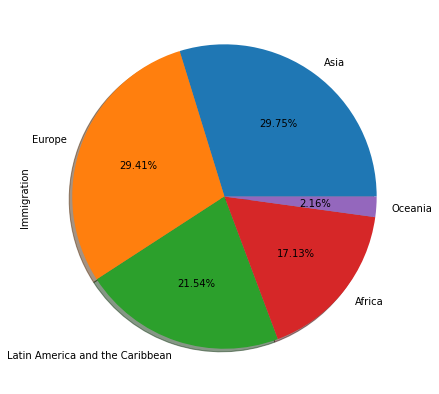

In [17]:
reg.Total.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Immigration', shadow=True)
plt.show()

# Plotting World Percentage

In [18]:
country['Percentage'] = pd.DataFrame(np.round(country.Total/country.Total.sum()*100, decimals=1))
country = country.drop(['Total'], axis=1)
country.head()

,Region,Percentage
Country,,
Sri Lanka,Asia,5.8
Poland,Europe,5.5
Lebanon,Asia,4.5
Jamaica,Latin America and the Caribbean,4.2
Viet Nam,Asia,3.8


In [19]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [20]:
map_data = dict(type = 'choropleth', locations = country.index, locationmode = 'country names', 
                z = country.Percentage, text=country.Region, colorscale= 'Reds', 
                marker = dict(line = dict(color='black', width=0.5)), colorbar = {'title':'Percentage'})
layout = dict(title = 'World Percentage in Immigration', geo = dict(showframe = False, projection = {'type':'natural earth'}))
choromap = go.Figure(data=map_data, layout=layout)
iplot(choromap)

# Thank You!